img.shape: (164, 138, 3)


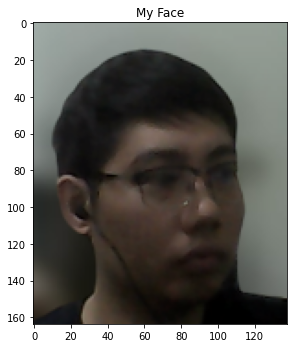

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('assets/gavFace.png')

plt.figure(figsize=(10,6))
# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(1,2,1)
plt.title('My Face')
plt.imshow(imgRGB)

print(f'img.shape: {img.shape}')
plt.show()